In [2]:
%matplotlib inline

import abtem
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk

abtem.config.set({"local_diagnostics.progress_bar": False});

from ase.build import surface

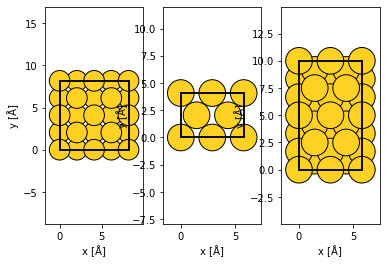

In [17]:
atoms = bulk("Au", cubic=True) * (1, 1, 1)
atoms100 = atoms * (2,2,5)
atoms110 = surface(atoms, indices=(1,1,0), layers=10, periodic=True)
atoms111 = abtem.orthogonalize_cell(surface(atoms, indices=(1,1,1), layers=3, periodic=True))
diamond = bulk("Si", cubic=True) * (1, 1, 10)

fig, (ax1,ax2,ax3)=plt.subplots(1, 3)
abtem.show_atoms(atoms100, show_periodic=True, scale=0.9, ax=ax1);
abtem.show_atoms(atoms110, show_periodic=True, scale=0.9, ax=ax2);
abtem.show_atoms(atoms111, show_periodic=True, scale=0.9, ax=ax3);

In [18]:
plane_wave = abtem.PlaneWave(energy=200e3, sampling=.05)

In [19]:
exit_wave100 = plane_wave.multislice(atoms100)
exit_wave110 = plane_wave.multislice(atoms110)
exit_wave111 = plane_wave.multislice(atoms111)
exit_wave_diamond = plane_wave.multislice(diamond)

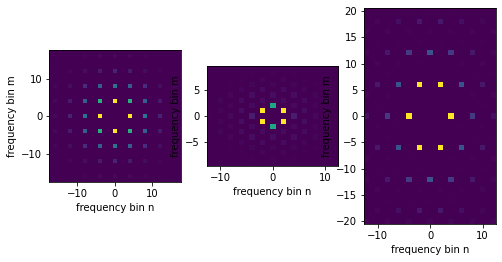

In [38]:
diffraction_patterns100 = exit_wave100.diffraction_patterns(block_direct=True, max_angle=50).compute()
diffraction_patterns110 = exit_wave110.diffraction_patterns(block_direct=True, max_angle=50).compute()
diffraction_patterns111 = exit_wave111.diffraction_patterns(block_direct=True, max_angle=50).compute()
diffraction_patterns_diamond = exit_wave_diamond.diffraction_patterns(block_direct=True, max_angle=20).compute()

fig, (ax1,ax2,ax3)=plt.subplots(1,3, figsize=(8,8))
diffraction_patterns100.show(ax=ax1, units="bins")
diffraction_patterns110.show(ax=ax2, units="bins")
diffraction_patterns111.show(ax=ax3, units="bins");

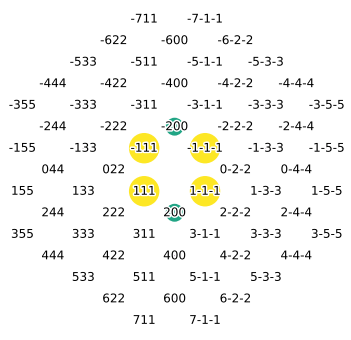

In [110]:
from abtem.visualize.mpl import plot_diffraction_pattern

plot_diffraction_pattern(
    diffraction_patterns110,
    cell_edges=4.08,
    spot_scale=1,
    spot_threshold=.01
);

1.3575000000000002
5 1.3575000000000002
5 1.3575000000000002
[-4  0] [ 0 -4] [-4  0  0] [ 0 -4  0]


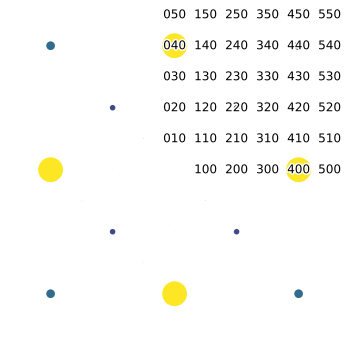

In [278]:
from abtem.visualize.mpl import plot_diffraction_pattern

plot_diffraction_pattern(
    diffraction_patterns_diamond,
    cell_edges=5.43,
    spot_scale=0.8,
    spot_threshold=.00
)

In [272]:
5.43 / np.sqrt(16)

1.3575

(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='frequency bin n', ylabel='frequency bin m'>)

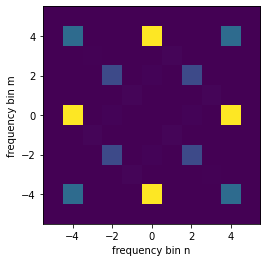

In [266]:
diffraction_patterns_diamond.show(units="bins")

In [268]:
3*2**2

12

In [269]:
4**2

16